In [1]:
import pandas as pd

# Load the dataset
df = pd.read_csv("D:/DS/Projects/Project5- Big_mart_sales_dataset/Data_set/Bigmart_original_dataset.csv")  # Replace with your file path if needed

# Preview the first 5 rows
print("🔹 First 5 Rows:")
print(df.head())

# Check shape of the dataset
print("\n🔹 Shape of dataset:", df.shape)

# Summary of columns and data types
print("\n🔹 Info:")
print(df.info())

# Summary statistics for numerical columns
print("\n🔹 Statistical Summary:")
print(df.describe())

# Check missing values in each column
print("\n🔹 Missing Values:")
print(df.isnull().sum())


🔹 First 5 Rows:
  Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0           FDA15         9.30          Low Fat         0.016047   
1           DRC01         5.92          Regular         0.019278   
2           FDN15        17.50          Low Fat         0.016760   
3           FDX07        19.20          Regular         0.000000   
4           NCD19         8.93          Low Fat         0.000000   

               Item_Type  Item_MRP Outlet_Identifier  \
0                  Dairy  249.8092            OUT049   
1            Soft Drinks   48.2692            OUT018   
2                   Meat  141.6180            OUT049   
3  Fruits and Vegetables  182.0950            OUT010   
4              Household   53.8614            OUT013   

   Outlet_Establishment_Year Outlet_Size Outlet_Location_Type  \
0                       1999      Medium               Tier 1   
1                       2009      Medium               Tier 3   
2                       1999      Medium   

In [2]:
# 🔍 Check missing values
print("Missing values before cleaning:\n", df.isnull().sum())


Missing values before cleaning:
 Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64


In [3]:
# Chcked for duplicates
duplicates = df[df.duplicated()]

In [4]:
# Step 1: Ensure Item_Weight is treated as numeric
df['Item_Weight'] = pd.to_numeric(df['Item_Weight'], errors='coerce')
df.columns = df.columns.str.strip()


# Step 2: Now calculate the mean and fill missing values
df['Item_Weight'] = df['Item_Weight'].fillna(df['Item_Weight'].mean())

# Step 3: Check if it worked
print(df.isnull().sum())


Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64


In [5]:

# 1. Show initial missing Outlet_Size values
print("Missing Outlet_Size before filling:", df['Outlet_Size'].isnull().sum())

# 2. Create a mapping: Most common Outlet_Size per Outlet_Type
size_mapping = df.groupby('Outlet_Type')['Outlet_Size'].agg(lambda x: x.mode()[0])
print("\nMost common Outlet_Size per Outlet_Type:\n", size_mapping)

# 3. Function to apply the mapped size where Outlet_Size is missing
def fill_outlet_size(row):
    if pd.isnull(row['Outlet_Size']):
        return size_mapping[row['Outlet_Type']]
    else:
        return row['Outlet_Size']

# 4. Apply the function
df['Outlet_Size'] = df.apply(fill_outlet_size, axis=1)

# 5. Confirm missing values are handled
print("\nMissing Outlet_Size after filling:", df['Outlet_Size'].isnull().sum())

Missing Outlet_Size before filling: 2410

Most common Outlet_Size per Outlet_Type:
 Outlet_Type
Grocery Store         Small
Supermarket Type1     Small
Supermarket Type2    Medium
Supermarket Type3    Medium
Name: Outlet_Size, dtype: object

Missing Outlet_Size after filling: 0


In [6]:
print("Missing values after cleaning:\n", df.isnull().sum())

Missing values after cleaning:
 Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64


In [8]:
# additional col added 
df['Outlet_Years'] = 2025 - df['Outlet_Establishment_Year']


In [9]:
# Extract first two letters of Item_Identifier and map to a readable category
df['Item_Category'] = df['Item_Identifier'].apply(lambda x: x[:2])

# Map code to category name
category_map = {
    'FD': 'Food',
    'DR': 'Drinks',
    'NC': 'Non-Consumable'
}

df['Item_Category'] = df['Item_Category'].map(category_map)


In [12]:
df['Item_Visibility_MeanRatio'] = df['Item_Visibility'] / df.groupby('Item_Identifier')['Item_Visibility'].transform('mean')


In [13]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Years,Item_Category,Item_Visibility_MeanRatio
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,26,Food,0.922960
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,16,Drinks,1.003057
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,26,Food,0.831990
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800,27,Food,0.000000
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,38,Non-Consumable,0.000000


In [15]:
# Save the cleaned and feature-engineered dataset
df.to_csv("D:/DS/Projects/Project5- Big_mart_sales_dataset/Data_set/Bigmart_cleaned_dataset.csv", index=False)
print("Cleaned dataset saved as 'Bigmart_cleaned_dataset.csv'")


Cleaned dataset saved as 'Bigmart_cleaned_dataset.csv'


In [16]:
# Group total sales by Outlet Establishment Year
sales_by_estd_year = df.groupby('Outlet_Establishment_Year')['Item_Outlet_Sales'].sum().reset_index()
sales_by_estd_year = sales_by_estd_year.sort_values('Outlet_Establishment_Year')

# Rename columns for clarity
sales_by_estd_year.columns = ['Year', 'Total_Sales']

print(sales_by_estd_year)


   Year   Total_Sales
0  1985  3.633620e+06
1  1987  2.142664e+06
2  1997  2.118395e+06
3  1998  1.883402e+05
4  1999  2.183970e+06
5  2002  2.036725e+06
6  2004  2.268123e+06
7  2007  2.167465e+06
8  2009  1.851823e+06


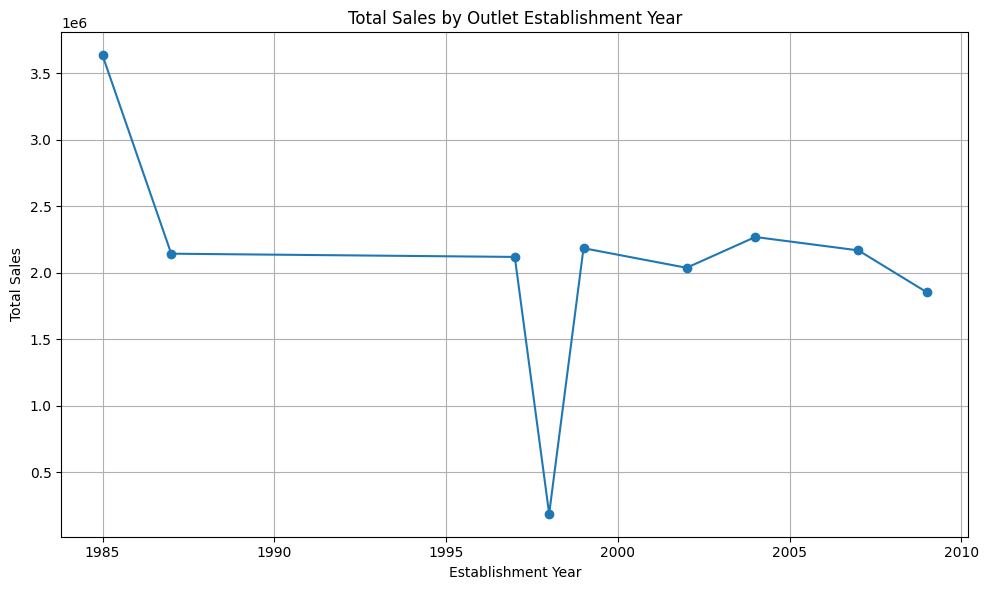

In [17]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(sales_by_estd_year['Year'], sales_by_estd_year['Total_Sales'], marker='o')
plt.title('Total Sales by Outlet Establishment Year')
plt.xlabel('Establishment Year')
plt.ylabel('Total Sales')
plt.grid(True)
plt.tight_layout()
plt.show()
